In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import time

In [3]:
# Load the digits dataset
digits = load_digits()

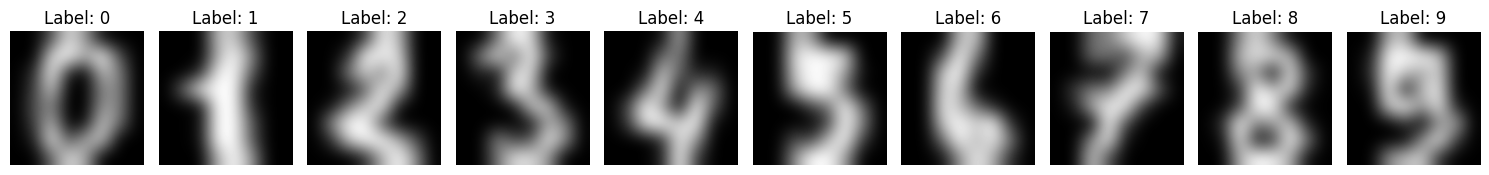

In [4]:
# Show some sample images along with their labels
num_images_to_show = 10

fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(15, 4), dpi=100)

for i in range(num_images_to_show):
    axes[i].imshow(digits.images[i], cmap='gray',interpolation='bicubic')  
    axes[i].set_title(f"Label: {digits.target[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Split the dataset into features and labels
X,y = digits.data, digits.target

In [6]:
# Binarize the labels for binary classification (0-4: 0, 5-9: 1)
y_binary = np.where(y < 5, 0, 1)

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [8]:
# Get the unique labels of train and test
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in training set:", unique_labels_train)
print("Unique labels in testing set:", unique_labels_test)

Unique labels in training set: [0 1]
Unique labels in testing set: [0 1]


In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

In [11]:
class NeuralNetworkBinary:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))

    def forward_propagation(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_layer_output = np.maximum(0, self.hidden_layer_input)  # ReLU activation in hidden layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = sigmoid(self.output_layer_input)
        return self.output
    
    def compute_loss(self, X, y):
        # Forward propagation to get predicted probabilities
        output = self.forward_propagation(X)

        # Compute binary cross-entropy loss
        m = y.shape[0]  # Number of samples
        loss = -1 / m * np.sum(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))

        return loss

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        loss_history = []  # Initialize list to store loss values
        fig, ax = plt.subplots()  # Create figure and axis objects for the plot
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss')
        pbar = tqdm(total=epochs, desc='Training')  # Initialize tqdm progress bar

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Backpropagation
            error = y - output
            d_output = error * sigmoid_derivative(output)  # Sigmoid derivative

            # Update weights and biases
            self.weights_hidden_output += np.dot(self.hidden_layer_output.T, d_output) * learning_rate
            self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
            d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.hidden_layer_output > 0)  # ReLU derivative
            self.weights_input_hidden += np.dot(X.T, d_hidden) * learning_rate
            self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
            
            
            # Record loss for the plot and show progress on progress bar
            
            # Compute loss and append to loss history
            loss = self.compute_loss(X, y)
            loss_history.append(loss)

            # Update progress bar description with current loss
            pbar.set_description('Training (loss: {:.4f})'.format(loss))
            pbar.update(1)  # Update progress bar

        # Plot loss function
        ax.plot(loss_history, color='blue')
        plt.show()  # Show the final plot
        
        pbar.close()  # Close tqdm progress bar after training completes

In [12]:
# Initialize the neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1  # Binary classification
nn_binary = NeuralNetworkBinary(input_size, hidden_size, output_size)

Training (loss: 6.1325):   0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/b6/3c0g2_td14s_f_7qt1km20yc0000gn/T/ipykernel_29790/441330538.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
Training (loss: 4.5407):   0%|          | 2/1000 [00:00<00:58, 17.04it/s]

Training (loss: 0.5860): 100%|█████████▉| 999/1000 [00:12<00:00, 70.91it/s] 

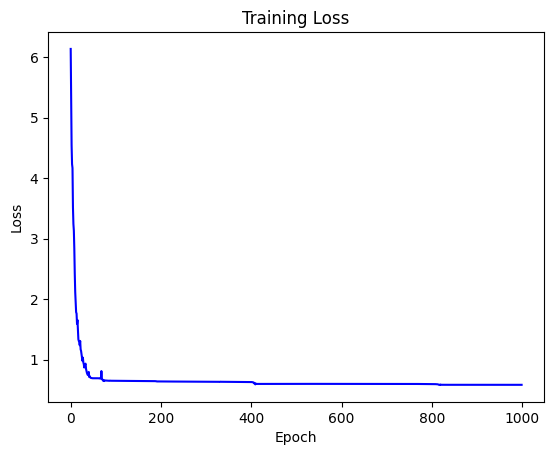

Training (loss: 0.5860): 100%|██████████| 1000/1000 [00:12<00:00, 77.01it/s]


In [13]:
# Train the neural network
nn_binary.train(X_train, y_train.reshape(-1, 1))

In [14]:
# Test the neural network
def predict(X):
    return np.where(nn_binary.forward_propagation(X) >= 0.5, 1, 0)

In [15]:
predictions = predict(X_test)

In [16]:
accuracy = np.mean(predictions == y_test.reshape(-1, 1))

In [17]:
print('Accuracy of the network on the test set: %.2f%%' % (accuracy * 100))

Accuracy of the network on the test set: 93.33%


In [19]:
# Get the unique labels of train and test
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in training set:", unique_labels_train)
print("Unique labels in testing set:", unique_labels_test)

Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in testing set: [0 1 2 3 4 5 6 7 8 9]


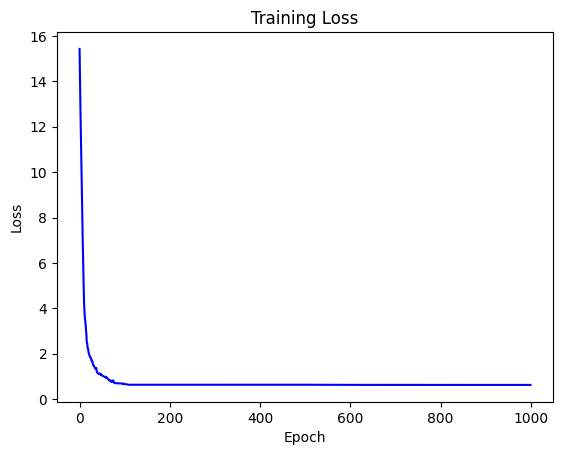

Training (loss: 0.6259): 100%|██████████| 1000/1000 [00:12<00:00, 76.99it/s]


Accuracy of the network on the test set: 90.83%


In [25]:
# Multi-class classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'''
1. A function to obtain the Softmax output for a given input z
'''
def softmax(z):
    z_out = np.exp(z - np.max(z, axis=1, keepdims=True))
    sm = z_out / np.sum(z_out, axis=1, keepdims=True)
    return sm

'''
2. A function that returns the partial derivative of the softmax function.
'''
def softmax_derivative(arg):
    return arg * (1 - arg)

'''
3. Write a class named NeuralNetwork:
'''
class NeuralNetwork:
    '''
    a. Inside the init function initialize:
    - the weight matrix w_1 between the hidden layer and the input layer,
    - the bias b_1 for the hidden layer
    - the weight matrix w_2 between the hidden layer and the output layer,
    - the bias b_2 for the output layer
    - you may also initialize the hidden layer input and output (optional)
    '''
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))
    '''
    b. forward propagation function
    Inside this function compute the following:
    - hidden layer input
    - hidden layer output
    - output layer input
    - softmax output
    In the hidden layer you will use the ReLU activation function.
    '''
    def forward_propagation(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_layer_output = np.maximum(0, self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = softmax(self.output_layer_input)
        return self.output
    '''
    c. Train function
    In this function you will train the Neural Network. 
    It should call the forward propagation function, also contain backpropagation code and update the weights. 
    You will also show a progress bar to indicate the progress of the training.
    You will also display a plot of loss vs. iterations.

    You would need to decide on the number of hidden layer units, epochs and the learning rate.
    '''

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        loss_history = []
        fig, ax = plt.subplots()
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss')
        pbar = tqdm(total=epochs, desc='Training')

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Loss computation
            m = y.shape[0]
            loss = -1 / m * np.sum(y * np.log(output + 1e-8))
            loss_history.append(loss)

            # Backpropagation
            error = y - output
            d_output = error * softmax_derivative(output)
            d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.hidden_layer_output > 0)

            # Update weights and biases
            self.weights_hidden_output += np.dot(self.hidden_layer_output.T, d_output) * learning_rate
            self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
            self.weights_input_hidden += np.dot(X.T, d_hidden) * learning_rate
            self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

            # Update progress bar description with current loss
            pbar.set_description('Training (loss: {:.4f})'.format(loss))
            pbar.update(1)

        # Plot loss function
        ax.plot(loss_history, color='blue')
        plt.show()

        pbar.close()

'''
4. Train and evaluate (15 points)

Your final step would be to train the Neural network and evaluate (test) it.

You will report the accuracy on the test set.

Note: Your accuracy at first may be very low. You would need to tinker with the hyperparameters to improve it.
'''
# Initialize the neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10  # Multi-class classification
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Convert labels to one-hot encoding
y_onehot = np.zeros((y_train.size, y_train.max() + 1))
y_onehot[np.arange(y_train.size), y_train] = 1

# Train the neural network
nn.train(X_train, y_onehot)

# Test the neural network
def predict(X):
    return np.argmax(nn.forward_propagation(X), axis=1)

predictions = predict(X_test)

accuracy = np.mean(predictions == y_test)
print('Accuracy of the network on the test set: %.2f%%' % (accuracy * 100))
